##### Write about Dataset and Why we are using it?

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

##### Types of Time Series Data
<img src="./images/time_series.jpg" />

In [192]:
df = pd.read_csv('./Dataset/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [193]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime']

0        2002-12-31 01:00:00
1        2002-12-31 02:00:00
2        2002-12-31 03:00:00
3        2002-12-31 04:00:00
4        2002-12-31 05:00:00
                 ...        
145361   2018-01-01 20:00:00
145362   2018-01-01 21:00:00
145363   2018-01-01 22:00:00
145364   2018-01-01 23:00:00
145365   2018-01-02 00:00:00
Name: Datetime, Length: 145366, dtype: datetime64[ns]

In [194]:
print(df.columns)

Index(['Datetime', 'PJME_MW'], dtype='object')


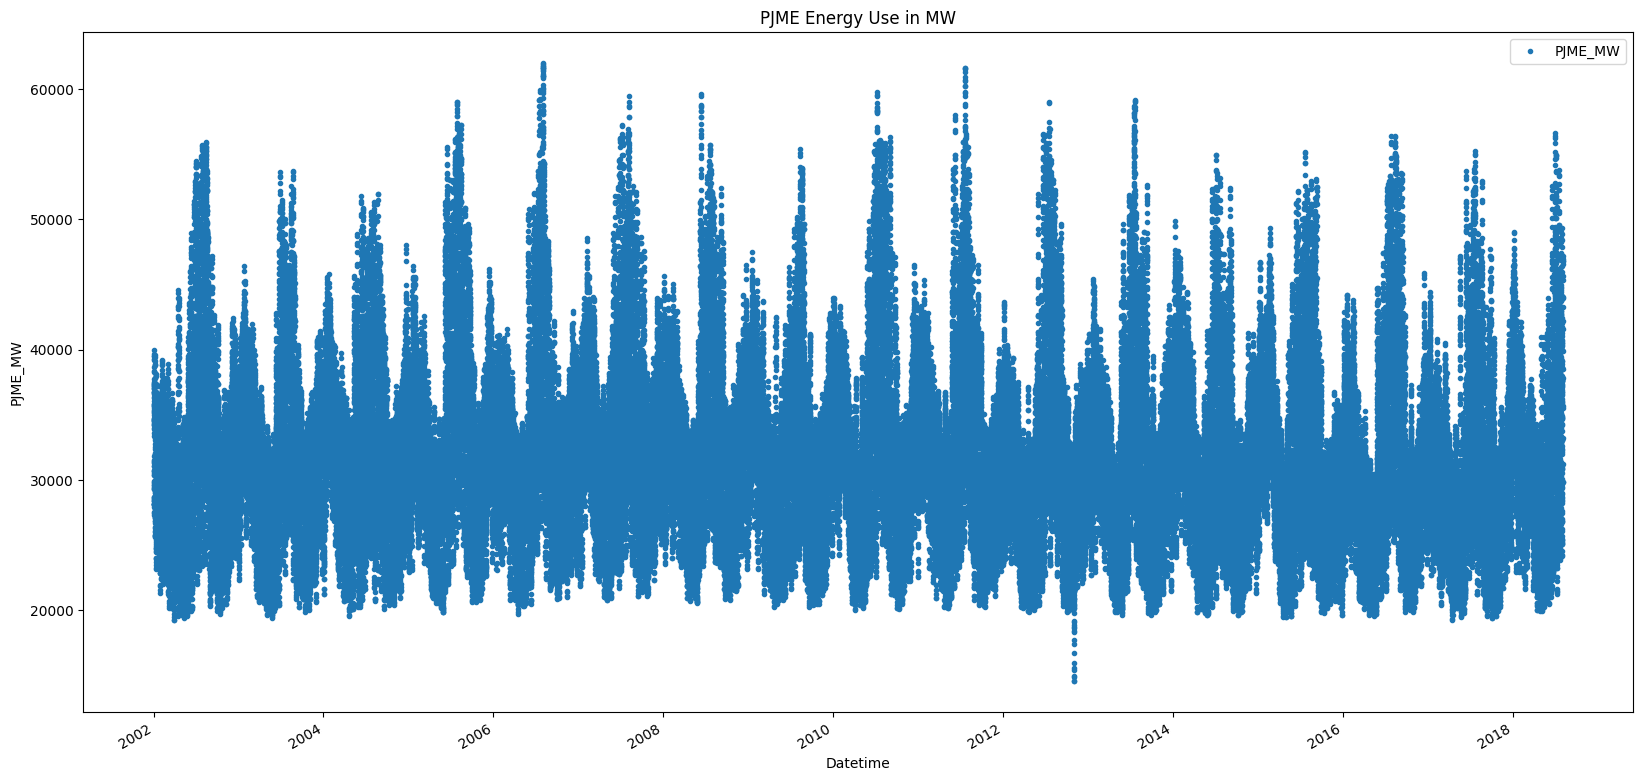

In [195]:
df.plot(style='.',figsize=(20,10),title='PJME Energy Use in MW',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()

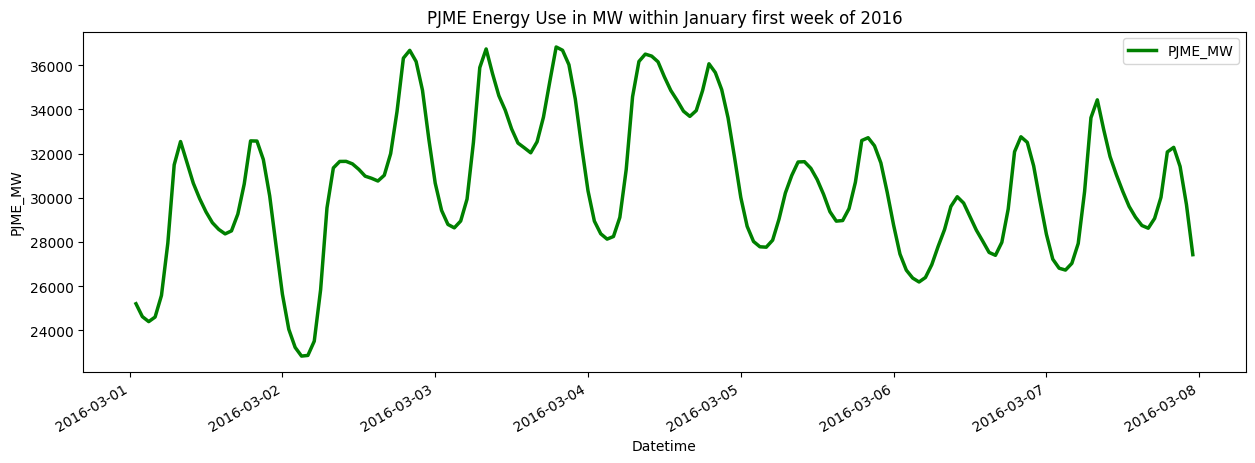

In [196]:
df.loc[(df['Datetime'] > '2016-03-01') & (df['Datetime'] < '2016-03-08')].\
    plot(figsize=(15, 5), title='PJME Energy Use in MW within January first week of 2016',linewidth=2.5,color='green',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()

##### Outlier Analysis
<img src="./images/outlier_analysis_fin.png" />

<AxesSubplot: ylabel='Frequency'>

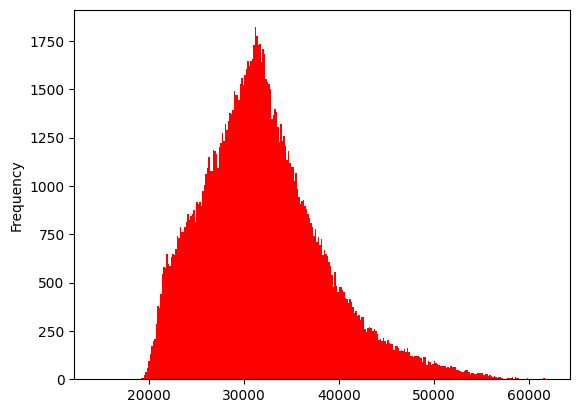

In [197]:
df['PJME_MW'].plot(kind='hist',bins=300,color='red')

<AxesSubplot: xlabel='Datetime'>

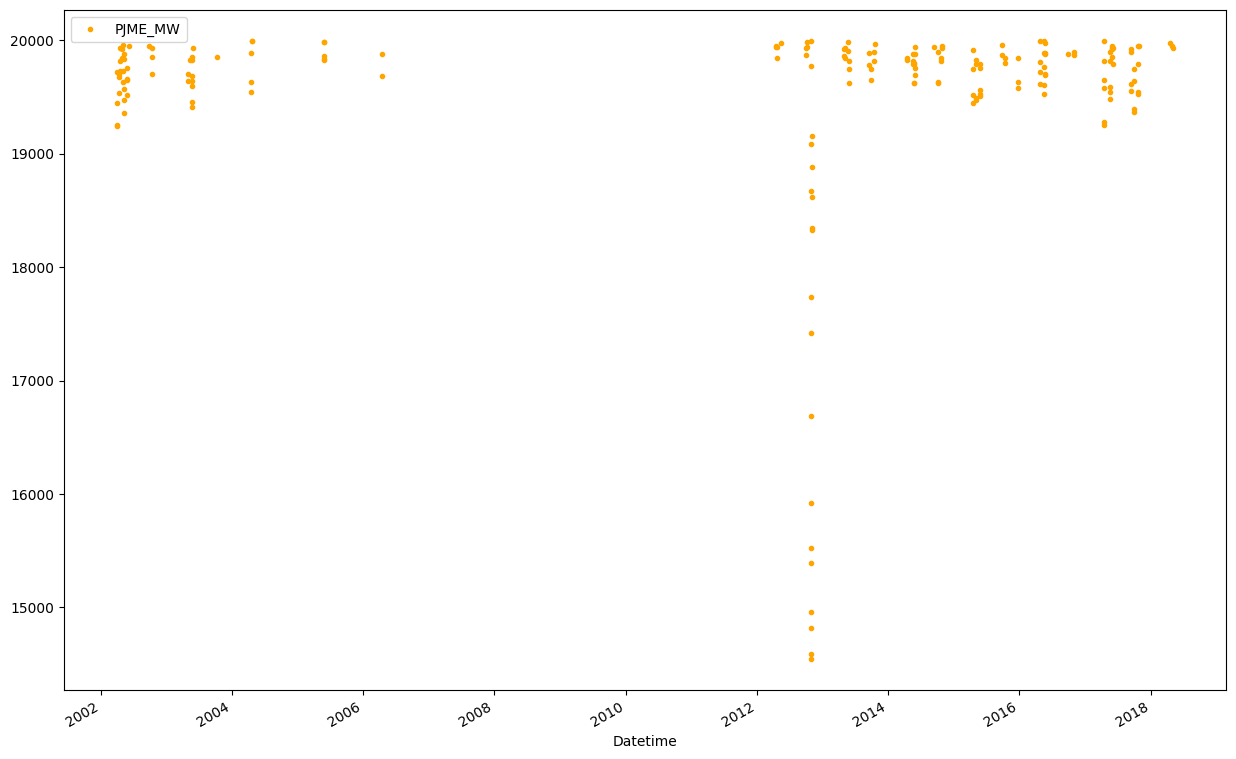

In [198]:
df.query('PJME_MW < 20000').plot(style='.',figsize=(15,10),x='Datetime',y='PJME_MW',color='orange')

<AxesSubplot: xlabel='Datetime'>

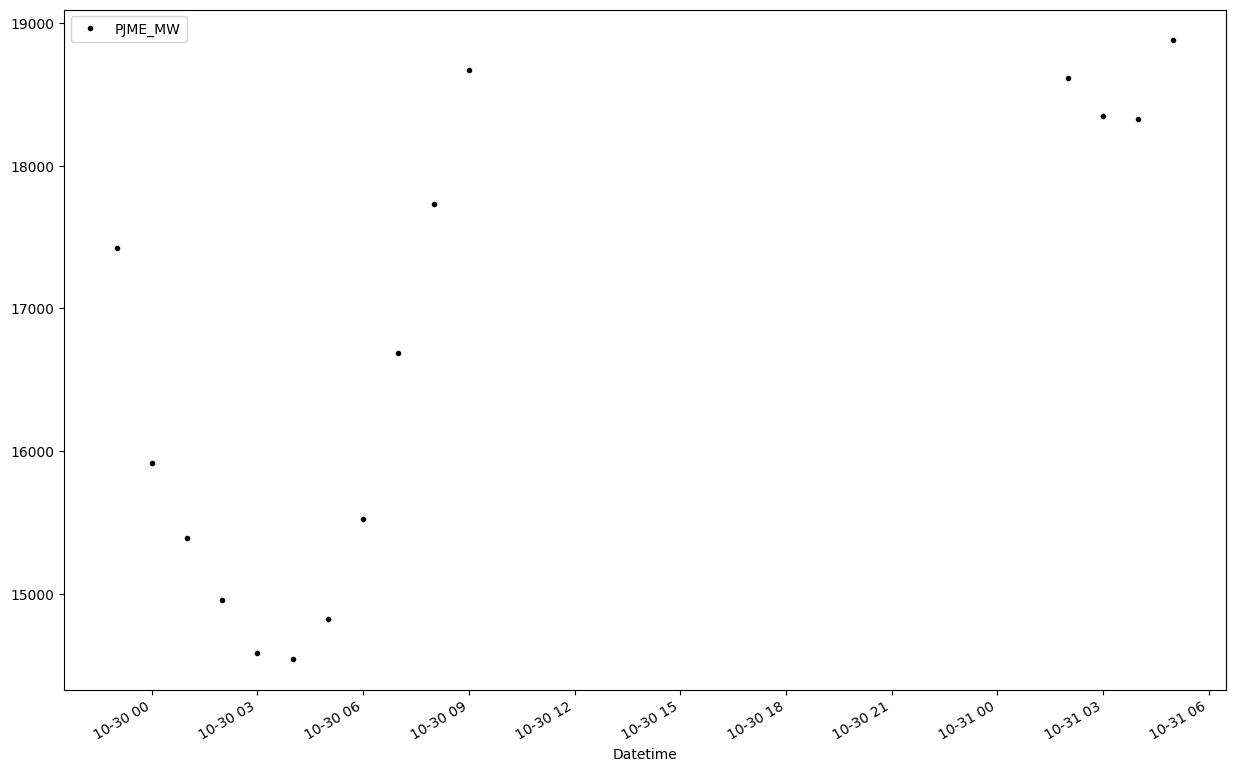

In [199]:
df.query('PJME_MW < 19_000').plot(style='.',figsize=(15,10),x='Datetime',y='PJME_MW',color='black')

In [200]:
print(df.shape)
print(df.query('PJME_MW > 19_000').shape)

(145366, 2)
(145351, 2)


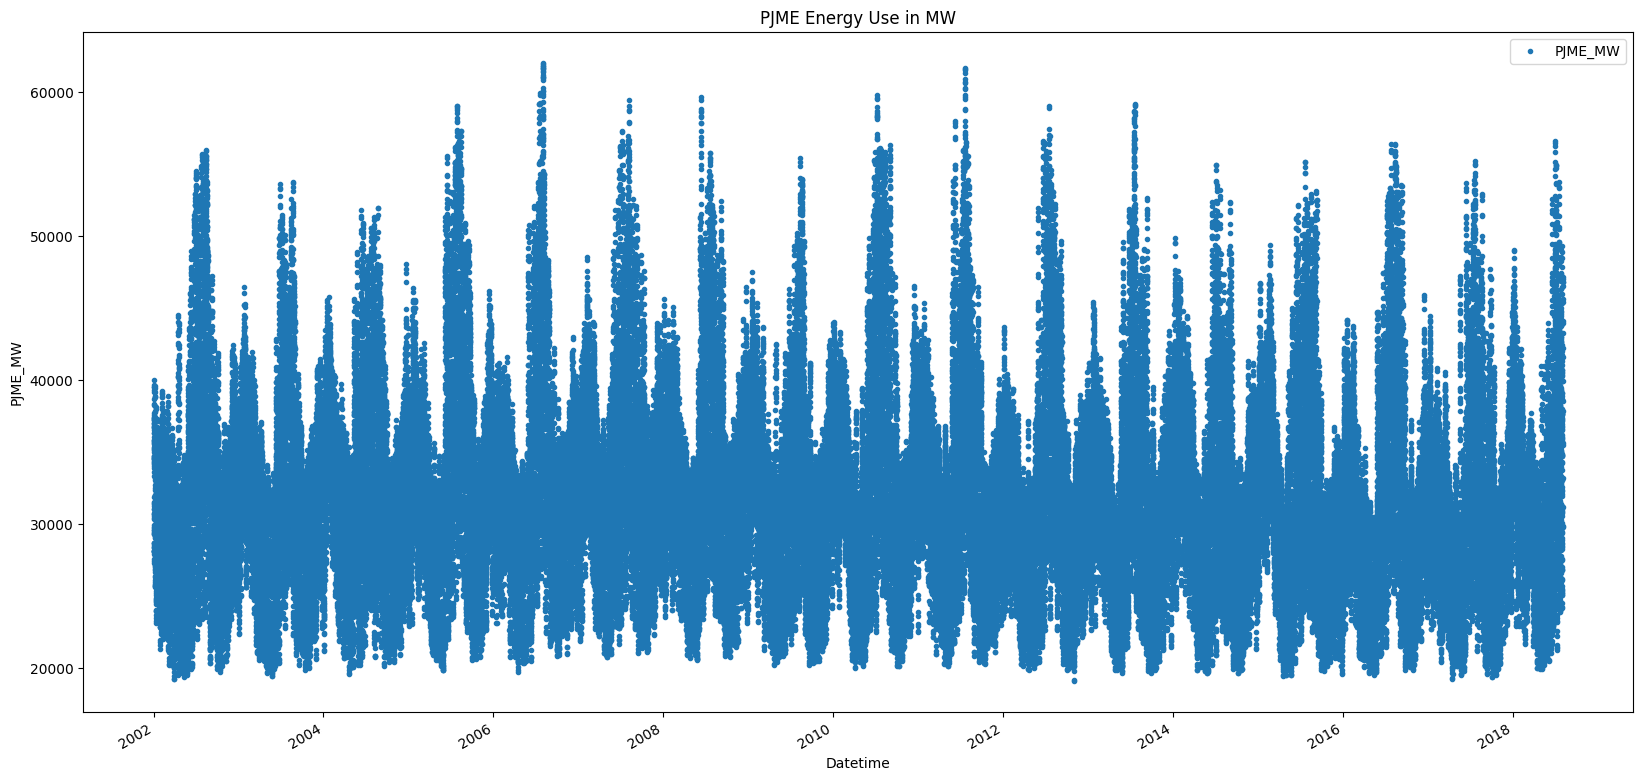

In [201]:
df = df.query('PJME_MW > 19_000')
df.plot(style='.',figsize=(20,10),title='PJME Energy Use in MW',x='Datetime',y='PJME_MW')
plt.xlabel('Datetime')
plt.ylabel('PJME_MW')
plt.show()
df = df.reset_index(drop=True)

##### Adding Lag Features

In [202]:
def Plot_Day_Time(d,t):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))

    for month in range(1, 13):
        filtered_df = df.loc[(df['Datetime'].dt.month == month) & (df['Datetime'].dt.day == d) &\
            (df['Datetime'].dt.time == pd.Timestamp(t).time())]
        row = (month - 1) // 4
        col = (month - 1) % 4
        axs[row, col].plot(filtered_df['Datetime'],filtered_df['PJME_MW'],'.',color='red')
        axs[row, col].set_ylim(20_000, 60_000)
        axs[row, col].set_title(f'Month {month}')
        axs[row, col].set_xlabel('Datetime')
        axs[row, col].set_ylabel('PJME_ME')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

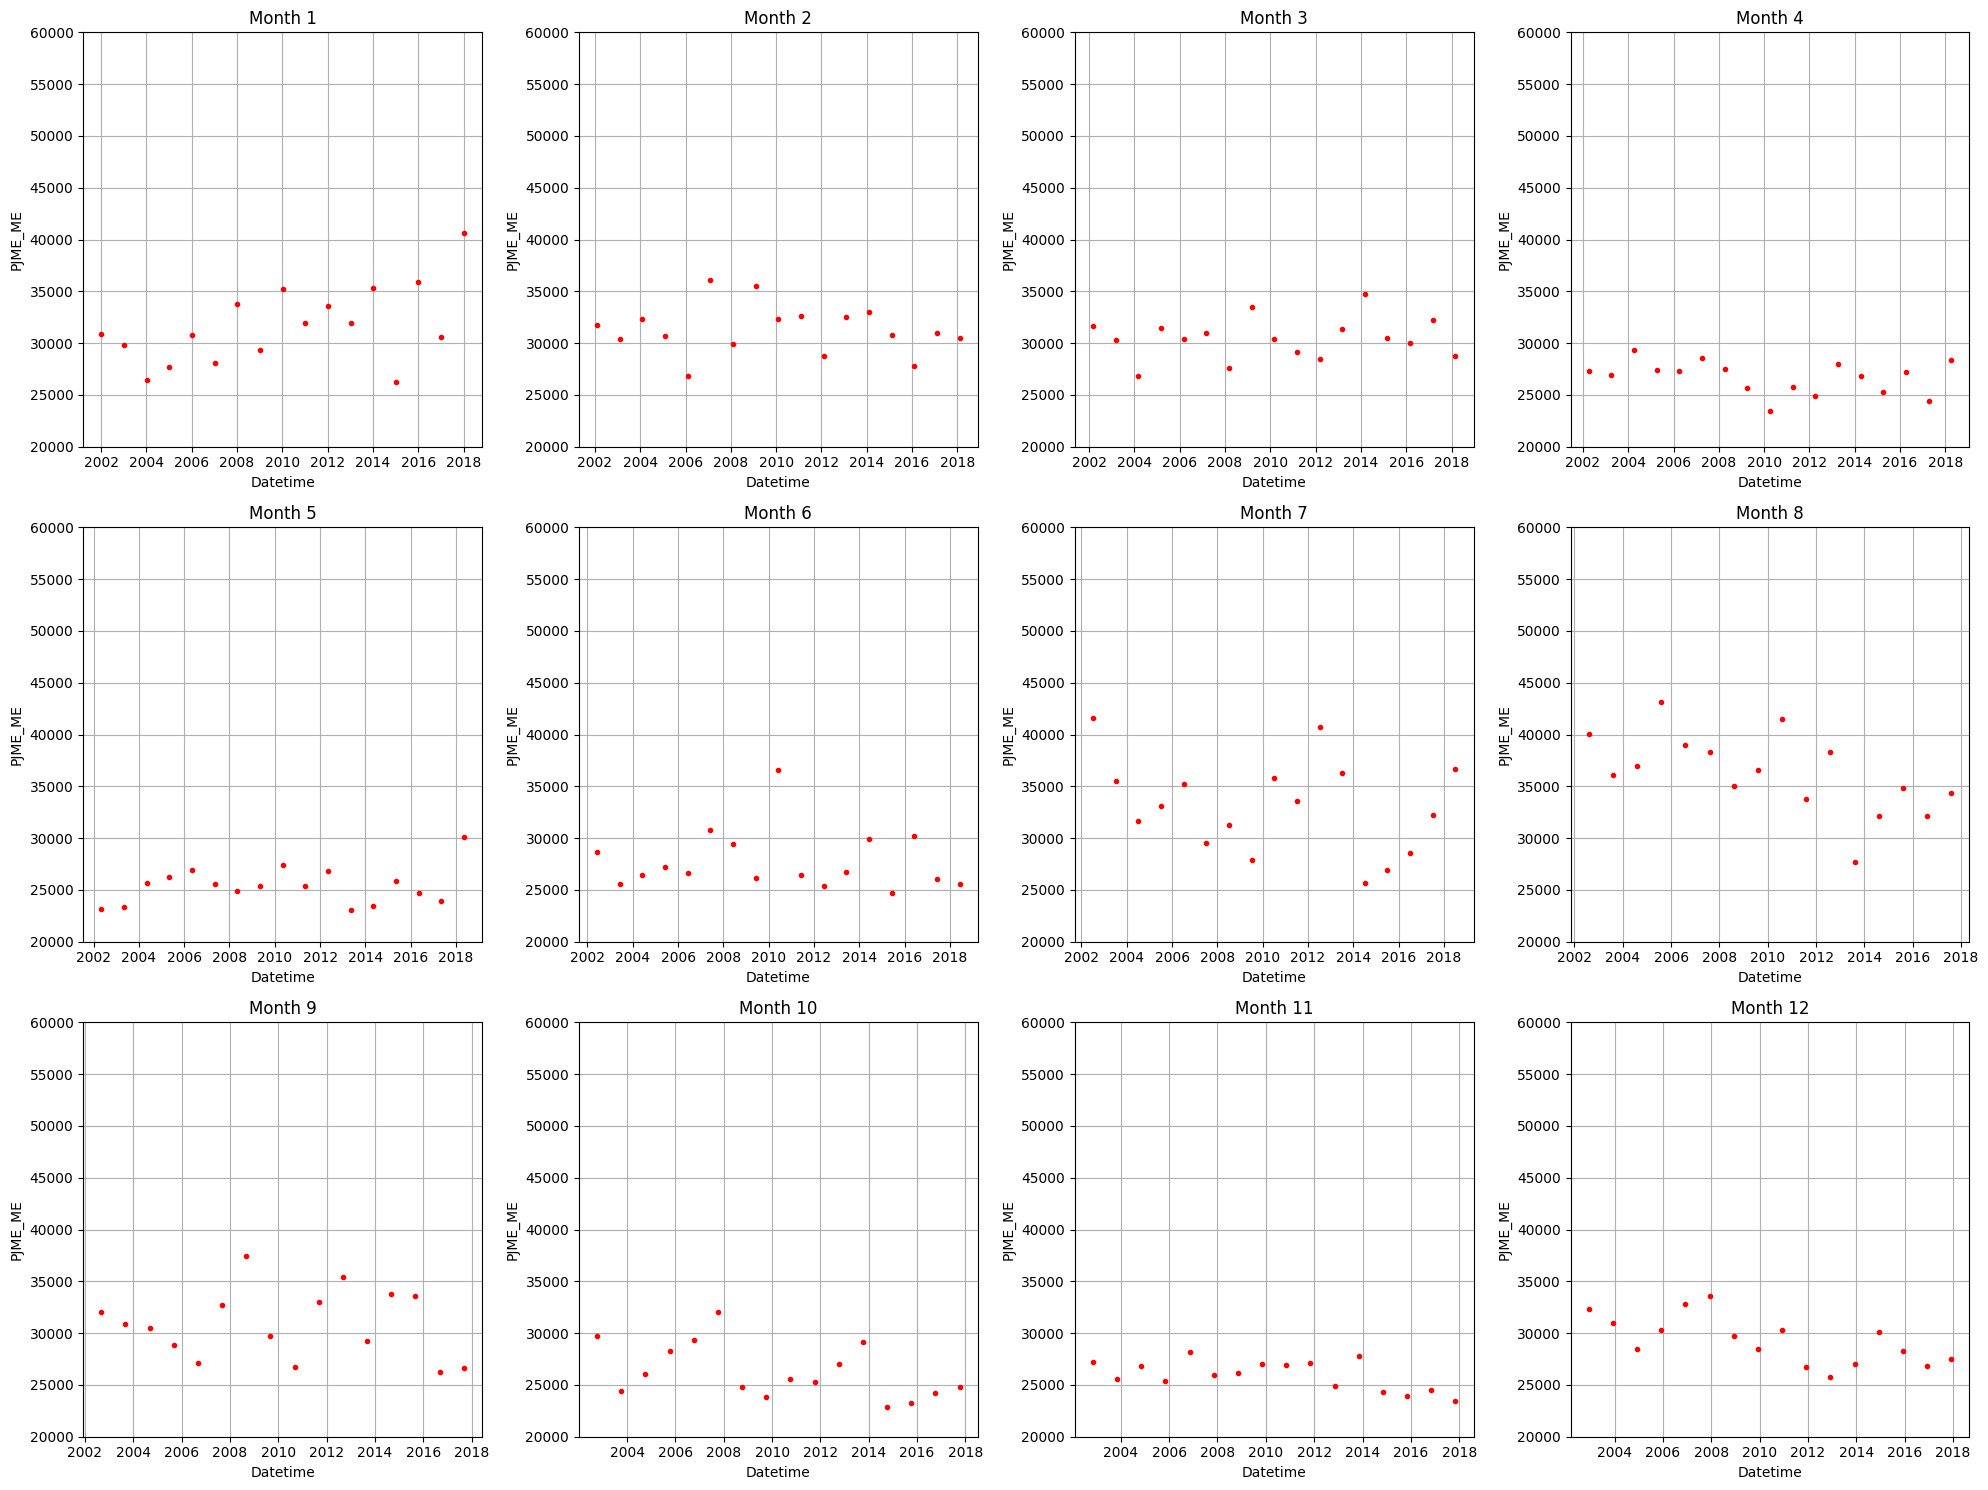

In [203]:
Plot_Day_Time(5,'00:00:00')

In [204]:
lag_dict = dict(zip(df['Datetime'], df['PJME_MW']))
df['Lag1'] = (df['Datetime']-pd.Timedelta('365 days')).map(lag_dict)
df['Lag2'] = (df['Datetime']-pd.Timedelta('730 days')).map(lag_dict)
# df['Lag3'] = (df['Datetime']-pd.Timedelta('1,095 days')).map(lag_dict)

In [205]:
df

,Datetime,PJME_MW,Lag1,Lag2
0,2002-12-31 01:00:00,26498.0,NaN,NaN
1,2002-12-31 02:00:00,25147.0,NaN,NaN
2,2002-12-31 03:00:00,24574.0,NaN,NaN
3,2002-12-31 04:00:00,24393.0,NaN,NaN
4,2002-12-31 05:00:00,24860.0,NaN,NaN
...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0


##### Trigonometric Encoding to handle cyclic features.

In [206]:
df['Hour'] = df['Datetime'].dt.hour.astype(int)
df['Day'] = df['Datetime'].dt.day.astype(int)
df['Month'] = df['Datetime'].dt.month.astype(int)
df['Year'] = df['Datetime'].dt.year.astype(int)
df

,Datetime,PJME_MW,Lag1,Lag2,Hour,Day,Month,Year
0,2002-12-31 01:00:00,26498.0,NaN,NaN,1,31,12,2002
1,2002-12-31 02:00:00,25147.0,NaN,NaN,2,31,12,2002
2,2002-12-31 03:00:00,24574.0,NaN,NaN,3,31,12,2002
3,2002-12-31 04:00:00,24393.0,NaN,NaN,4,31,12,2002
4,2002-12-31 05:00:00,24860.0,NaN,NaN,5,31,12,2002
...,...,...,...,...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0,20,1,1,2018
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0,21,1,1,2018
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0,22,1,1,2018
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0,23,1,1,2018


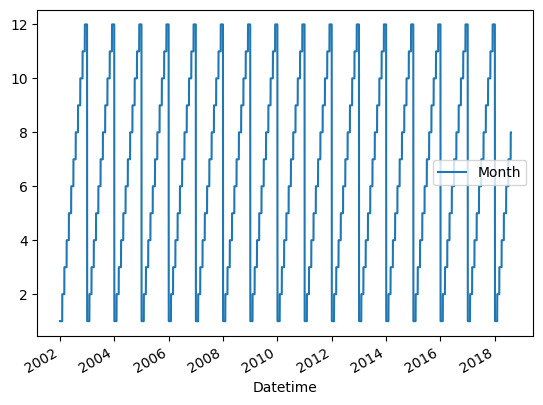

In [207]:
df.plot('Datetime','Month')
plt.show()

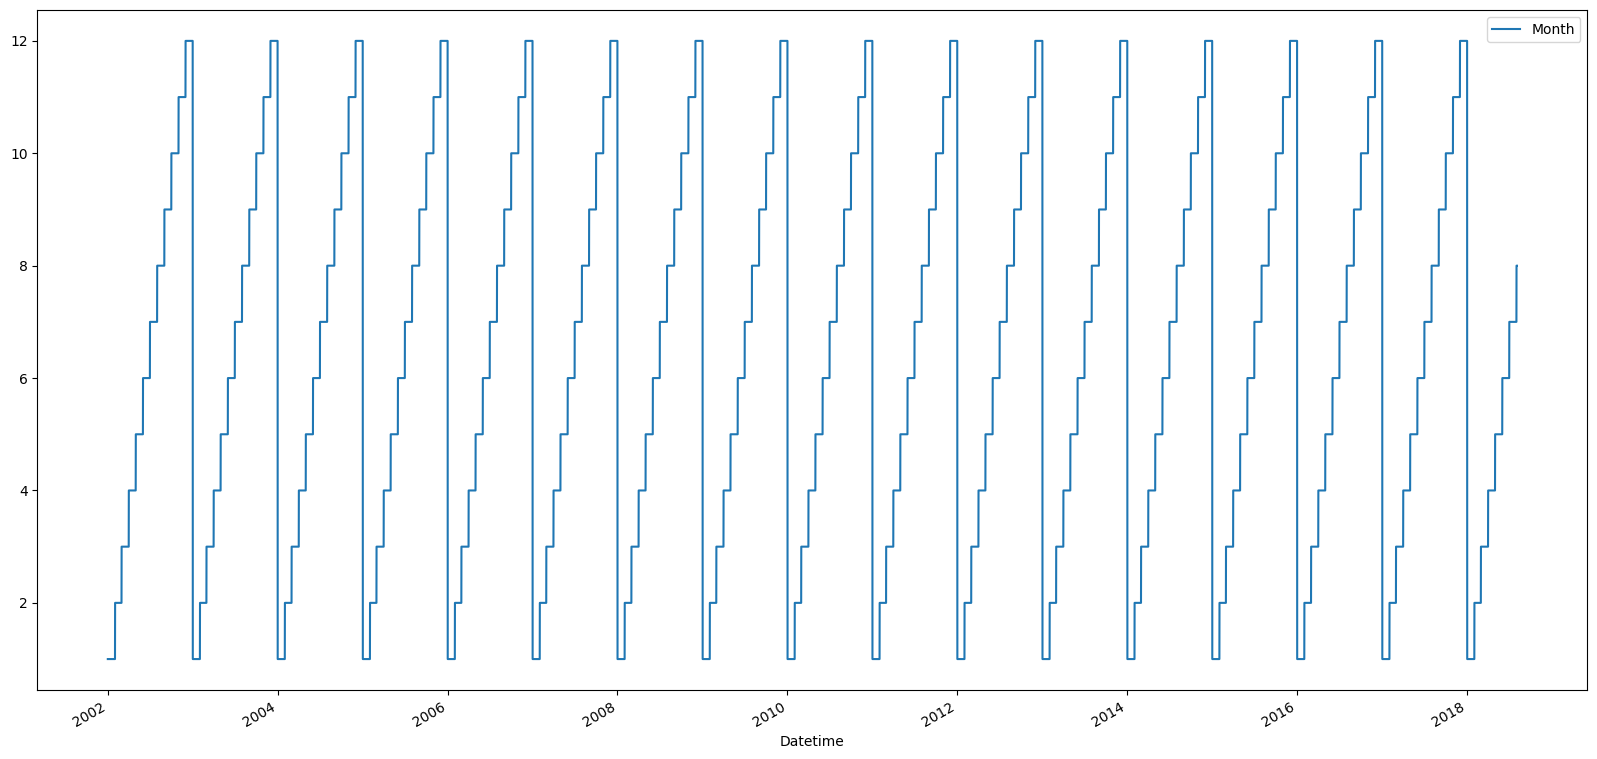

In [209]:
df.plot('Datetime','Month',figsize=(20,10))
plt.show()


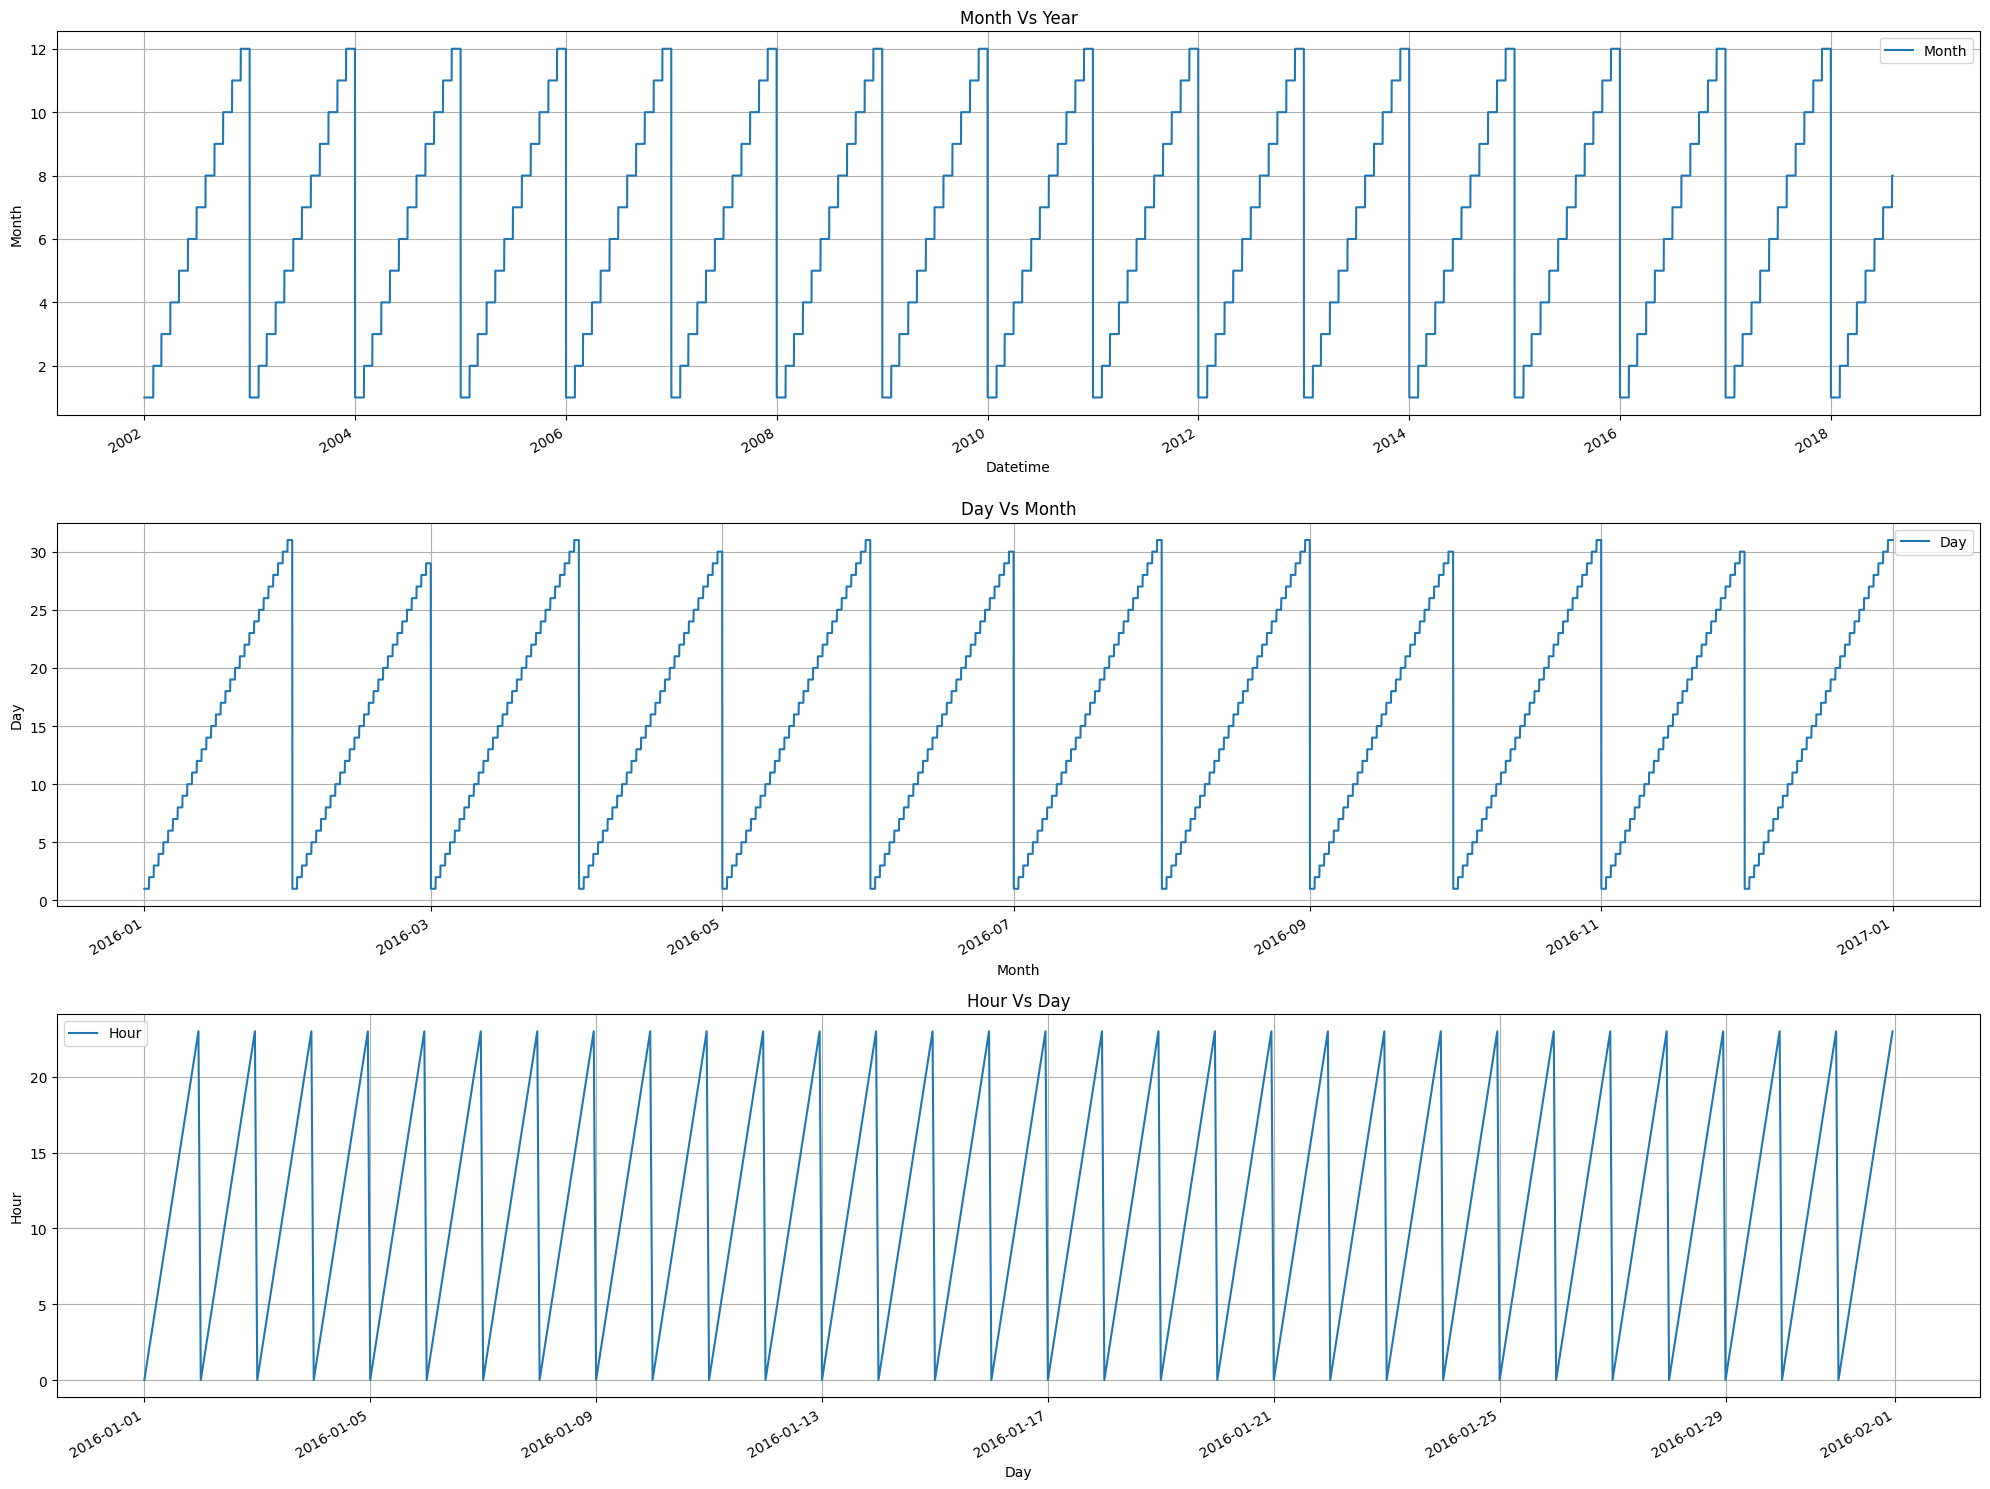

In [210]:
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

df.plot('Datetime','Month',ax=axs[0])
axs[0].set_title('Month Vs Year')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('Month')
axs[0].grid(True)

df.loc[(df['Datetime'].dt.year == 2016)].plot('Datetime','Day',ax=axs[1])
axs[1].set_title('Day Vs Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Day')
axs[1].grid(True)

df.loc[(df['Datetime'].dt.year == 2016) & (df['Datetime'].dt.month == 1)].plot('Datetime','Hour',ax=axs[2])
axs[2].set_title('Hour Vs Day')
axs[2].set_xlabel('Day')
axs[2].set_ylabel('Hour')
axs[2].grid(True)


plt.tight_layout()
plt.show()

In [211]:
hour_in_day=df['Hour'].nunique()
day_in_month=df['Day'].nunique()
month_in_year=df['Month'].nunique()
day_in_year = 366
print(str(hour_in_day)+' '+str(day_in_month)+' '+str(month_in_year))

24 31 12


In [212]:
def CalculateDayIndex(day,month,year):
    index = 0
    Days_Months = [
        31,  # January
        28,  # February (non-leap year)
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31   # December
    ]
    Days_Months_Leap = [
        31,  # January
        29,  # February (leap year)
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31   # December
    ]
    
    if((year%4) != 0):
        for i in range(0,month-1):
            index += Days_Months[i]
        index += day
    else:
        for i in range(0,month-1):
            index += Days_Months_Leap[i]
        index += day
    return index


In [213]:
print(CalculateDayIndex(1,2,2021))
print(CalculateDayIndex(29,2,2024))

32
60


In [214]:
df.iloc[0]

Datetime    2002-12-31 01:00:00
PJME_MW                 26498.0
Lag1                        NaN
Lag2                        NaN
Hour                          1
Day                          31
Month                        12
Year                       2002
Name: 0, dtype: object

In [215]:
len(df)
df.iloc[145350]
CalculateDayIndex(df.iloc[145350]['Day'],df.iloc[145350]['Month'],df.iloc[145350]['Year'])
np.cos((2*(np.pi)*CalculateDayIndex(df.iloc[145350]['Day'],df.iloc[145350]['Month'],df.iloc[145350]['Year']))/day_in_year)

0.9994106342455052

In [177]:
np.sin((2*(np.pi)*CalculateDayIndex(31,12,2018))/day_in_year)

-0.017166329754707492

In [216]:
df

,Datetime,PJME_MW,Lag1,Lag2,Hour,Day,Month,Year
0,2002-12-31 01:00:00,26498.0,NaN,NaN,1,31,12,2002
1,2002-12-31 02:00:00,25147.0,NaN,NaN,2,31,12,2002
2,2002-12-31 03:00:00,24574.0,NaN,NaN,3,31,12,2002
3,2002-12-31 04:00:00,24393.0,NaN,NaN,4,31,12,2002
4,2002-12-31 05:00:00,24860.0,NaN,NaN,5,31,12,2002
...,...,...,...,...,...,...,...,...
145346,2018-01-01 20:00:00,44284.0,31448.0,32878.0,20,1,1,2018
145347,2018-01-01 21:00:00,43751.0,31246.0,32586.0,21,1,1,2018
145348,2018-01-01 22:00:00,42402.0,30526.0,31877.0,22,1,1,2018
145349,2018-01-01 23:00:00,40164.0,29209.0,30590.0,23,1,1,2018


In [ ]:
df['Hour_sin'] = np.sin(2*np.pi*df['Hour']/hour_in_day)
df['Hour_cos'] = np.cos(2*np.pi*df['Hour']/hour_in_day)

Day_Sine = []
Day_Cosine = []

for i in range(0,len(df)):
    Day_Sine.append(np.sin((2*(np.pi)*(CalculateDayIndex(df.iloc[i]['Day'],df.iloc[i]['Month'],df.iloc[i]['Year'])))/day_in_year))
    Day_Cosine.append(np.cos((2*(np.pi)*(CalculateDayIndex(df.iloc[i]['Day'],df.iloc[i]['Month'],df.iloc[i]['Year'])))/day_in_year))
    print(i)
df['Day_sin'] = Day_Sine
df['Day_cos'] = Day_Cosine
# df['Month_sin'] = np.sin(2*np.pi*df['Month']/month_in_year)
# df['Month_cos'] = np.cos(2*np.pi*df['Month']/month_in_year)

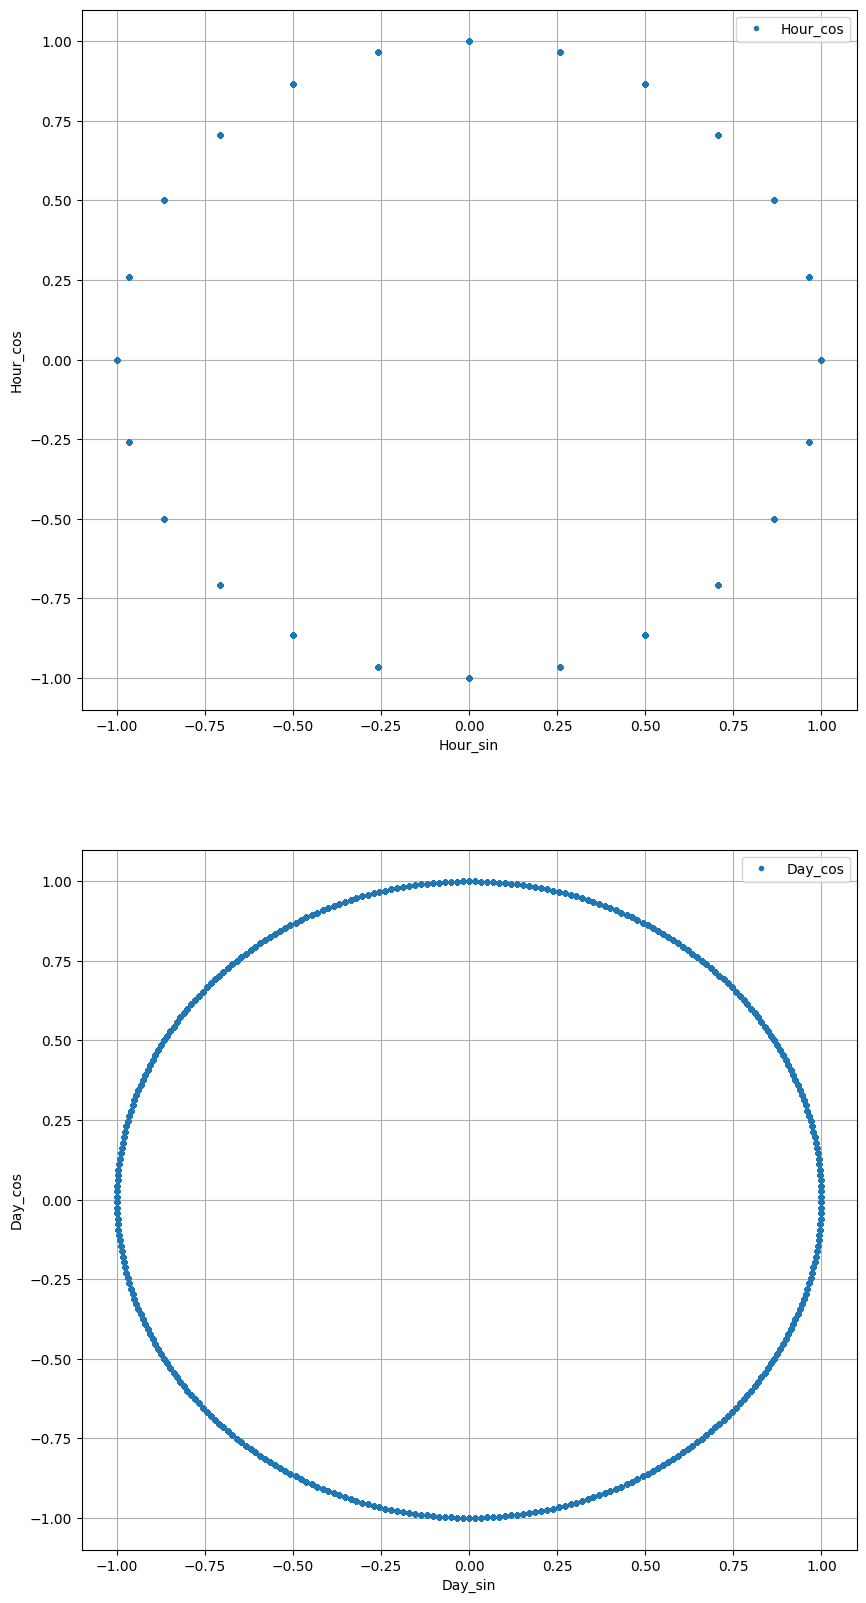

In [218]:
fig, axs = plt.subplots(2, 1,figsize=(10,20))

df.plot('Hour_sin','Hour_cos',ax=axs[0],style='.')
axs[0].set_xlabel('Hour_sin')
axs[0].set_ylabel('Hour_cos')
axs[0].grid(True)

df.plot('Day_sin','Day_cos',ax=axs[1],style='.')
axs[1].set_xlabel('Day_sin')
axs[1].set_ylabel('Day_cos')
axs[1].grid(True)

plt.show()

In [219]:
df.columns

Index(['Datetime', 'PJME_MW', 'Lag1', 'Lag2', 'Hour', 'Day', 'Month', 'Year',
       'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos'],
      dtype='object')

In [220]:
df = df.drop(columns=['Hour','Day','Month','Year','Datetime'])

In [221]:
df.head()

,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,26498.0,NaN,NaN,0.258819,0.965926,-0.017166,0.999853
1,25147.0,NaN,NaN,0.500000,0.866025,-0.017166,0.999853
2,24574.0,NaN,NaN,0.707107,0.707107,-0.017166,0.999853
3,24393.0,NaN,NaN,0.866025,0.500000,-0.017166,0.999853
4,24860.0,NaN,NaN,0.965926,0.258819,-0.017166,0.999853


In [222]:
df = df.dropna(subset=['Lag2'])
df = df.reset_index(drop=True)

In [223]:
df

,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,27160.0,27077.0,25591.0,0.258819,0.965926,-2.449294e-16,1.000000
1,25791.0,25957.0,24235.0,0.500000,0.866025,-2.449294e-16,1.000000
2,25052.0,24930.0,23121.0,0.707107,0.707107,-2.449294e-16,1.000000
3,24797.0,24359.0,22445.0,0.866025,0.500000,-2.449294e-16,1.000000
4,25026.0,24400.0,22332.0,0.965926,0.258819,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...
127787,44284.0,31448.0,32878.0,-0.866025,0.500000,1.716633e-02,0.999853
127788,43751.0,31246.0,32586.0,-0.707107,0.707107,1.716633e-02,0.999853
127789,42402.0,30526.0,31877.0,-0.500000,0.866025,1.716633e-02,0.999853
127790,40164.0,29209.0,30590.0,-0.258819,0.965926,1.716633e-02,0.999853


In [224]:
with open('dataframe.pickle', 'wb') as f:
    pickle.dump(df, f)

In [225]:
with open('dataframe.pickle', 'rb') as f:
    new_df = pickle.load(f)

new_df

,PJME_MW,Lag1,Lag2,Hour_sin,Hour_cos,Day_sin,Day_cos
0,27160.0,27077.0,25591.0,0.258819,0.965926,-2.449294e-16,1.000000
1,25791.0,25957.0,24235.0,0.500000,0.866025,-2.449294e-16,1.000000
2,25052.0,24930.0,23121.0,0.707107,0.707107,-2.449294e-16,1.000000
3,24797.0,24359.0,22445.0,0.866025,0.500000,-2.449294e-16,1.000000
4,25026.0,24400.0,22332.0,0.965926,0.258819,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...
127787,44284.0,31448.0,32878.0,-0.866025,0.500000,1.716633e-02,0.999853
127788,43751.0,31246.0,32586.0,-0.707107,0.707107,1.716633e-02,0.999853
127789,42402.0,30526.0,31877.0,-0.500000,0.866025,1.716633e-02,0.999853
127790,40164.0,29209.0,30590.0,-0.258819,0.965926,1.716633e-02,0.999853
